<a href="https://colab.research.google.com/github/Asvikap/Fashion_Product_recomendation/blob/main/fashion_products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/fashion_products.csv")

In [3]:
df

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M
...,...,...,...,...,...,...,...,...,...
995,20,996,Shoes,Zara,Women's Fashion,55,1.620081,Black,M
996,42,997,Sweater,Nike,Kids' Fashion,13,1.544464,Green,L
997,9,998,Sweater,Zara,Men's Fashion,47,3.961913,White,L
998,8,999,T-shirt,Zara,Women's Fashion,68,3.089722,Blue,S


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
list(df)

['User ID',
 'Product ID',
 'Product Name',
 'Brand',
 'Category',
 'Price',
 'Rating',
 'Color',
 'Size']

In [6]:
df.shape

(1000, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       1000 non-null   int64  
 1   Product ID    1000 non-null   int64  
 2   Product Name  1000 non-null   object 
 3   Brand         1000 non-null   object 
 4   Category      1000 non-null   object 
 5   Price         1000 non-null   int64  
 6   Rating        1000 non-null   float64
 7   Color         1000 non-null   object 
 8   Size          1000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [8]:
df.sort_values("Rating", ascending = False)

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
501,61,502,Dress,Zara,Kids' Fashion,33,4.987964,Blue,M
417,82,418,Jeans,Zara,Men's Fashion,34,4.986091,Blue,S
578,26,579,Shoes,Gucci,Women's Fashion,57,4.985950,White,XL
198,39,199,T-shirt,Zara,Women's Fashion,15,4.980656,Black,M
703,6,704,T-shirt,Adidas,Kids' Fashion,38,4.979678,Green,M
...,...,...,...,...,...,...,...,...,...
135,34,136,Shoes,Zara,Men's Fashion,45,1.017655,Blue,XL
35,18,36,Dress,H&M,Kids' Fashion,74,1.014996,Green,S
650,35,651,Shoes,Gucci,Men's Fashion,16,1.005087,Yellow,XL
559,31,560,Dress,Adidas,Women's Fashion,99,1.002064,Red,XL


In [9]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

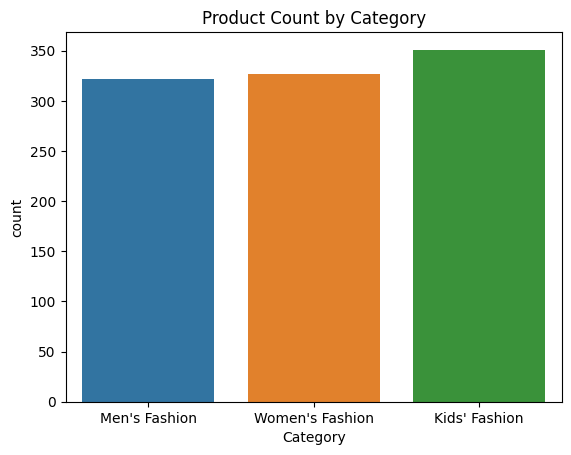

In [10]:
sn.countplot( data = df ,x = "Category")
plt.title('Product Count by Category')
plt.show()

<ipython-input-11-7ea20f9a7223>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr(),annot = True)


<Axes: >

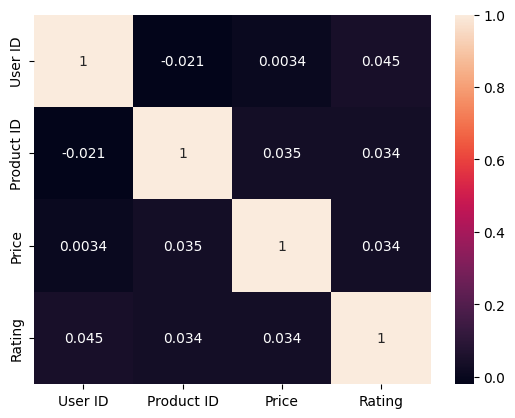

In [11]:
sn.heatmap(df.corr(),annot = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


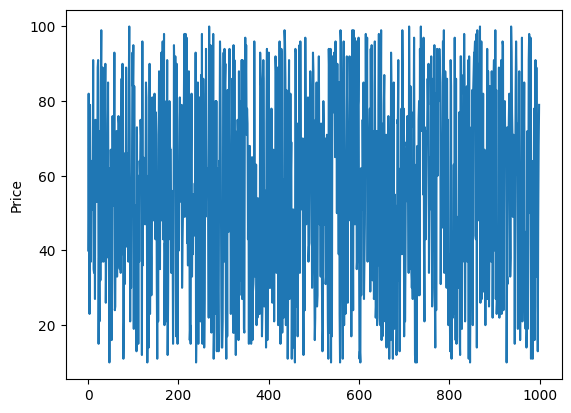

In [20]:
sn.lineplot(df['Price'])
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


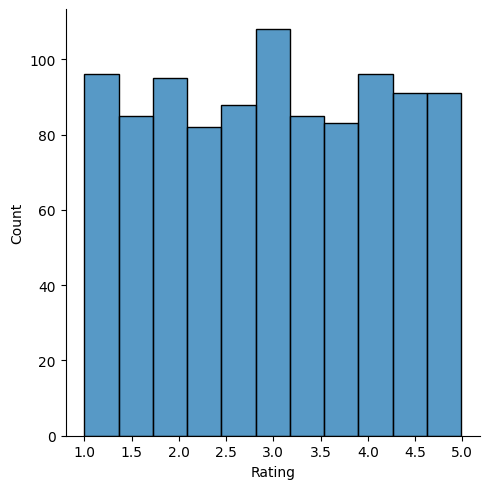

In [22]:
sn.displot(df['Rating'])
plt.show()

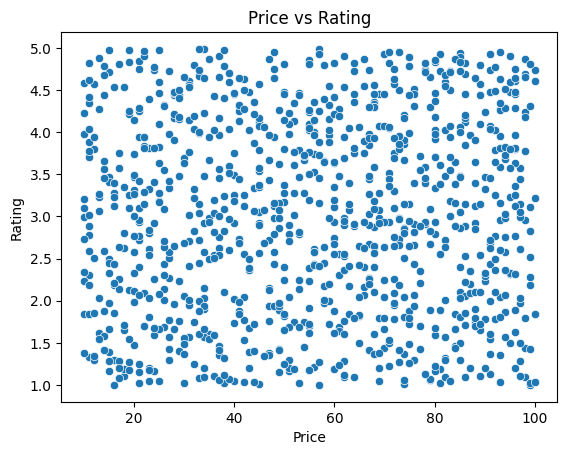

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [24]:
sn.scatterplot(data=df, x='Price', y='Rating')
plt.title("Price vs Rating")
plt.show()

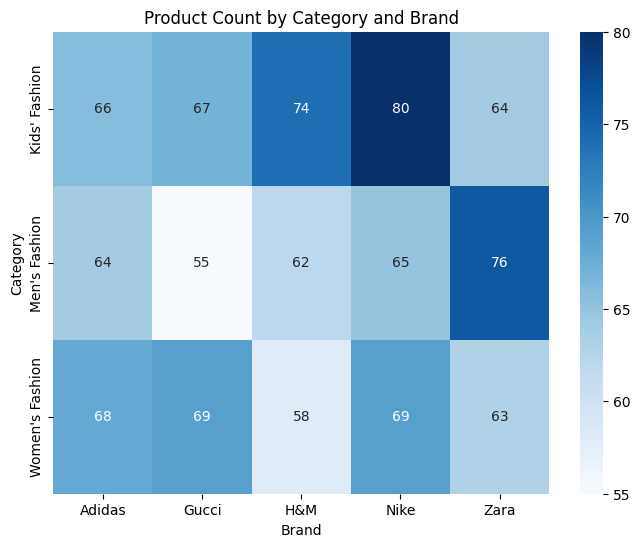

<Figure size 800x600 with 0 Axes>

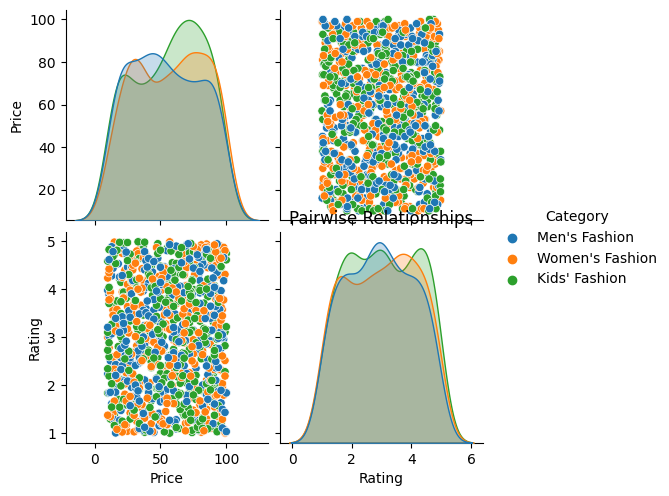

In [26]:
plt.figure(figsize=(8, 6))
category_brand_counts = df.groupby(['Category', 'Brand']).size().unstack()
sn.heatmap(data=category_brand_counts, cmap='Blues', annot=True, fmt='g')
plt.title('Product Count by Category and Brand')
plt.show()

plt.figure(figsize=(8, 6))
sn.pairplot(df[['Price', 'Rating', 'Category']], hue='Category')
plt.title('Pairwise Relationships')
plt.show()

In [29]:
pip install surprise

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3096334 sha256=02fc2e451e1e7b3bed082f129ea1b0b1f9496b0a25f8e914949e636402b5a84a
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py:85: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.10/dist-packages/scikit_surprise-1.1.3.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):
/usr/local/lib/python3.10/dist-packages/google/colab/_pip.py:85: ResourceWarning: unclosed file <_io.TextIOWrapper name=

In [30]:
from sklearn.preprocessing import LabelEncoder
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split

In [32]:
# Create the Surprise dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['User ID', 'Brand', 'Rating']], reader)

# Split the data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)

# Collaborative Filtering using SVD
algo_cf = SVD()
algo_cf.fit(trainset)

# Brand-Based Recommendation System
def brand_recommendation(user_id, num_recommendations):
    # Collaborative Filtering predictions
    cf_predictions = algo_cf.test(testset)

    # Filter predictions based on user ID and brand
    user_brand_predictions = [pred for pred in cf_predictions if pred.uid == user_id and pred.iid in df[df['User ID'] == user_id]['Brand'].unique()]

    # Sort the predictions by rating in descending order
    user_brand_predictions.sort(key=lambda x: x.est, reverse=True)

    # Get the top N recommendations
    top_recommendations = user_brand_predictions[:num_recommendations]

    return top_recommendations

# Example usage: Get brand recommendations for User ID 97, top 3 recommendations
user_id = 97
num_recommendations = 3
recommendations = brand_recommendation(user_id, num_recommendations)

# Print the recommendations
print(f"Brand Recommendations for User ID {user_id}:")
for recommendation in recommendations:
    brand = recommendation.iid
    rating = recommendation.est
    print(f"Brand: {brand}, Rating: {rating}")

Brand Recommendations for User ID 97:
Brand: H&M, Rating: 2.824273881607695
Brand: Nike, Rating: 2.716703919442915
Brand: Zara, Rating: 2.322364849127036
